In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [40]:
import matplotlib.pyplot as plt
import pandas as pd

## Load and Examine Dataset

# load and check dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/BrentOilPrices.csv')
data.head()

Date  Price
0  May 20, 1987  18.63
1  May 21, 1987  18.45
2  May 22, 1987  18.55
3  May 25, 1987  18.60
4  May 26, 1987  18.63

# Task A 

a) Data Visualisation: Define simple line chart to give an idea of the stock price change Brent oil price information for the last 20 years 

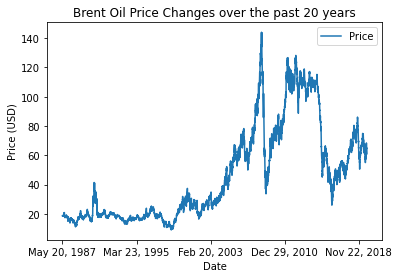

In [41]:

#visualizing the data
data.plot(x='Date', y='Price', style='-')
plt.title('Brent Oil Price Changes over the past 20 years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

b) Build explanatory variables — the features we are going to use to predict the price of oil. The variables we will be using at this stage, are the moving averages for the past three (MA3) and nine days (MA9), based on input from the oil stock market.

In [42]:
# Creating the variables 
#calculating the moving average for the past 3 and 9 days
MA3 = data['Price'].rolling(window = 3).mean()
MA9 = data['Price'].rolling(window = 9).mean()

#add the moving averages to the data frame
data['MA3'] = MA3
data['MA9'] = MA9

# Output the new DataFrame
data.head()

Date  Price        MA3  MA9
0  May 20, 1987  18.63        NaN  NaN
1  May 21, 1987  18.45        NaN  NaN
2  May 22, 1987  18.55  18.543333  NaN
3  May 25, 1987  18.60  18.533333  NaN
4  May 26, 1987  18.63  18.593333  NaN

In [43]:
#Check for NAN values

data.isnull().sum()

Date     0
Price    0
MA3      2
MA9      8
dtype: int64

In [44]:
#dropping NAN values
data.dropna(inplace = True)

c) Define the Train and Test Data: This step covers the preparation of the train data and the test data.

In [46]:
# split the dataset into training and test set
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]


d) Build a Linear Regression Model (LR) using the moving averages for the past three (MA3) and nine days (MA9) as inputs;

In [47]:
from sklearn.linear_model import LinearRegression

# Create the feature set
X_train = train[['MA3', 'MA9']]
y_train = train['Price']
X_test = test[['MA3', 'MA9']]
y_test = test['Price']

#fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:

#Print the intercept and coefficients
print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_)


Intercept: 0.015829366923938437
Coefficient: [ 1.21540419 -0.215695  ]


In [49]:
#predict the price
prediction = model.predict(data[['MA3', 'MA9']])
print(prediction)

[18.62521061 18.65642308 18.71810615 ... 62.5065936  61.98047999
 61.51543279]


e) Prediction Function and Result: In this step, run the model using the test data we defined in step four. Visualise the predicted versus the actual stock values for the specific time period and calculate the model’s accuracy

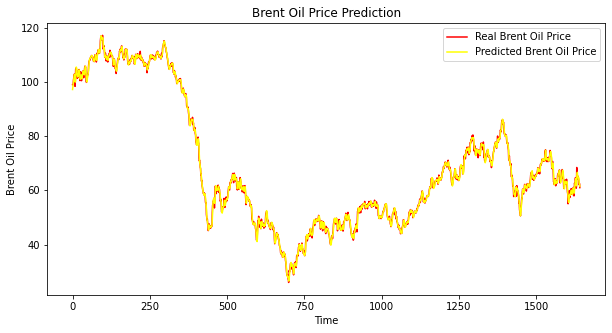

In [55]:
# Predict the price of Brent oil
y_pred = model.predict(X_test)

# Visualising the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, color='red', label='Real Brent Oil Price')
plt.plot(y_pred, color='yellow', label='Predicted Brent Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Brent Oil Price')
plt.legend()
plt.show()


f) Calculate the alpha and betas value: Define the linear regression equation using the alpha and betas values

In [17]:
#calculate the alpha and beta values
alpha = model.intercept_
beta1 = model.coef_[0]
beta2 = model.coef_[1]

#print the values
print("Alpha = ",alpha)
print("Beta1 = ",beta1)
print("Beta2 = ",beta2)


Alpha =  0.015829366923938437
Beta1 =  1.2154041879574142
Beta2 =  -0.21569499828740904


In [84]:
#define the linear regression equation
def linear_regression_equation(MA3, MA9):
  prediction = alpha + beta1 * MA3 + beta2 * MA9
  return prediction

#predict the price
prediction = linear_regression_equation(MA3, MA9)
print("Predicted Price = ",prediction)

Predicted Price =  0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
8211    64.752049
8212    63.568996
8213    62.502990
8214    61.977028
8215    61.512055
Name: Price, Length: 8216, dtype: float64


In [19]:
# Importing dataset for part B
data = pd.read_csv('/content/drive/MyDrive/BrentOilPrices.csv')
data = data.dropna()
data = data.drop(['Date'], axis=1)

# Task B

a) Define the Train and Test Data: This step covers the preparation of the train data and the test data. Explain the techniques used to generate the train data and the test data for the given Brent oil price time series data set.


In [20]:
# Splitting data into train and test sets
training_set = data.iloc[:int(data.shape[0]*0.8), 0:1].values
test_set = data.iloc[int(data.shape[0]*0.8):, 0:1].values

In [21]:
# Normalization

# Importing the libraries
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


b) Build the Model: Define the Long Short-Term Memory model (LSTM) and clearly
explain the input features as a function of time lag

In [24]:
#lmporting the Keras Libraries and packages 

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

# Initialising the RNN 

reg = Sequential()

# Add layer one of LSTM
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

# Add layer two of LSTM
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Add layer three of LSTM
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Add layer four of LSTM
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

# Add layer of output
reg.add(Dense(units = 1))

# RNN compilation
reg.compile(optimizer = "adam", loss= "mean_squared_error")

# Fitting the RNN model
reg.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
204/204 [==============================] - 33s 123ms/step - loss: 0.0043
Epoch 2/200
204/204 [==============================] - 24s 120ms/step - loss: 0.0018
Epoch 3/200
204/204 [==============================] - 24s 120ms/step - loss: 0.0015
Epoch 4/200
204/204 [==============================] - 28s 136ms/step - loss: 0.0014
Epoch 5/200
204/204 [==============================] - 24s 120ms/step - loss: 0.0012
Epoch 6/200
204/204 [==============================] - 24s 120ms/step - loss: 0.0012
Epoch 7/200
204/204 [==============================] - 25s 121ms/step - loss: 0.0011
Epoch 8/200
204/204 [==============================] - 24s 120ms/step - loss: 0.0010
Epoch 9/200
204/204 [==============================] - 26s 128ms/step - loss: 0.0010
Epoch 10/200
204/204 [==============================] - 25s 121ms/step - loss: 9.4011e-04
Epoch 11/200
204/204 [==============================] - 24s 119ms/step - loss: 9.6381e-04
Epoch 12/200
204/204 [==============================] -

c) Prediction Function and Result: In this step, we are running the model using
the test data we defined in step four. Visualise the predicted versus the actual
stock values for the specific time period

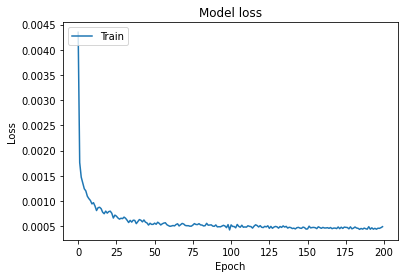

In [25]:
# Plot the training loss

plt.plot(reg.history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train"], loc = "upper left")
plt.show()


52/52 [==============================] - 3s 56ms/step


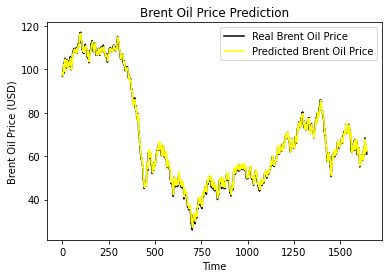

In [30]:

# Getting the real stock price of 2017
data_total = pd.concat((data['Price'][:int(data.shape[0]*0.8)], data['Price'][int(data.shape[0]*0.8):]), axis = 0)
inputs = data_total[len(data_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# Creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Getting the predicted stock price of 2017
pred_stock_price = reg.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)


# Visualising the results
plt.plot(test_set, color = 'black', label = 'Real Brent Oil Price')
plt.plot(pred_stock_price, color = 'yellow', label = 'Predicted Brent Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Brent Oil Price (USD)')
plt.legend()
plt.show()


In [56]:
# display the predicted and actual values
print('Predicted Brent Oil Price: ', pred_stock_price)
print('Actual Brent Oil Price: ', test_set)

Predicted Brent Oil Price:  [[98.31024 ]
 [97.1725  ]
 [97.18403 ]
 ...
 [62.75389 ]
 [62.165436]
 [62.4242  ]]
Actual Brent Oil Price:  [[96.84]
 [97.48]
 [98.94]
 ...
 [62.08]
 [62.48]
 [60.99]]


In [58]:
# Mean Squared Error
mse = mean_squared_error(test_set, pred_stock_price)
print('Mean Squared Error: ', mse)


Mean Squared Error:  1.5816673429683792
